## import libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

## Read Dataset

In [2]:
data = pd.read_csv("/kaggle/input/booking-dataset/first inten project.csv")

In [3]:
data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [4]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [6]:
print(data.describe())

       number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.0000

## Check Missing Value

In [7]:
data.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

## know Unique Value for some columns

In [8]:
data['type of meal'].unique()


array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [9]:
data['type of meal'].value_counts()


type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [10]:
data['market segment type'].unique()


array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [11]:
data['market segment type'].value_counts()


market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [12]:
data['room type'].unique()


array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [13]:
data['room type'].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [14]:
data['booking status'].unique()


array(['Not_Canceled', 'Canceled'], dtype=object)

In [15]:
data['booking status'].value_counts()


booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

## Casting Features

In [16]:
data = data.drop(['Booking_ID', 'date of reservation'], axis=1)

## Handle Catogrical Data

In [17]:
encoder = LabelEncoder()

data['type of meal'] = encoder.fit_transform(data['type of meal'])
data['room type'] = encoder.fit_transform(data['room type'])
data['market segment type'] = encoder.fit_transform(data['market segment type'])
data['booking status'] = encoder.fit_transform(data['booking status'])

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   number of adults          36285 non-null  int64  
 1   number of children        36285 non-null  int64  
 2   number of weekend nights  36285 non-null  int64  
 3   number of week nights     36285 non-null  int64  
 4   type of meal              36285 non-null  int64  
 5   car parking space         36285 non-null  int64  
 6   room type                 36285 non-null  int64  
 7   lead time                 36285 non-null  int64  
 8   market segment type       36285 non-null  int64  
 9   repeated                  36285 non-null  int64  
 10  P-C                       36285 non-null  int64  
 11  P-not-C                   36285 non-null  int64  
 12  average price             36285 non-null  float64
 13  special requests          36285 non-null  int64  
 14  bookin

## correlation for Data

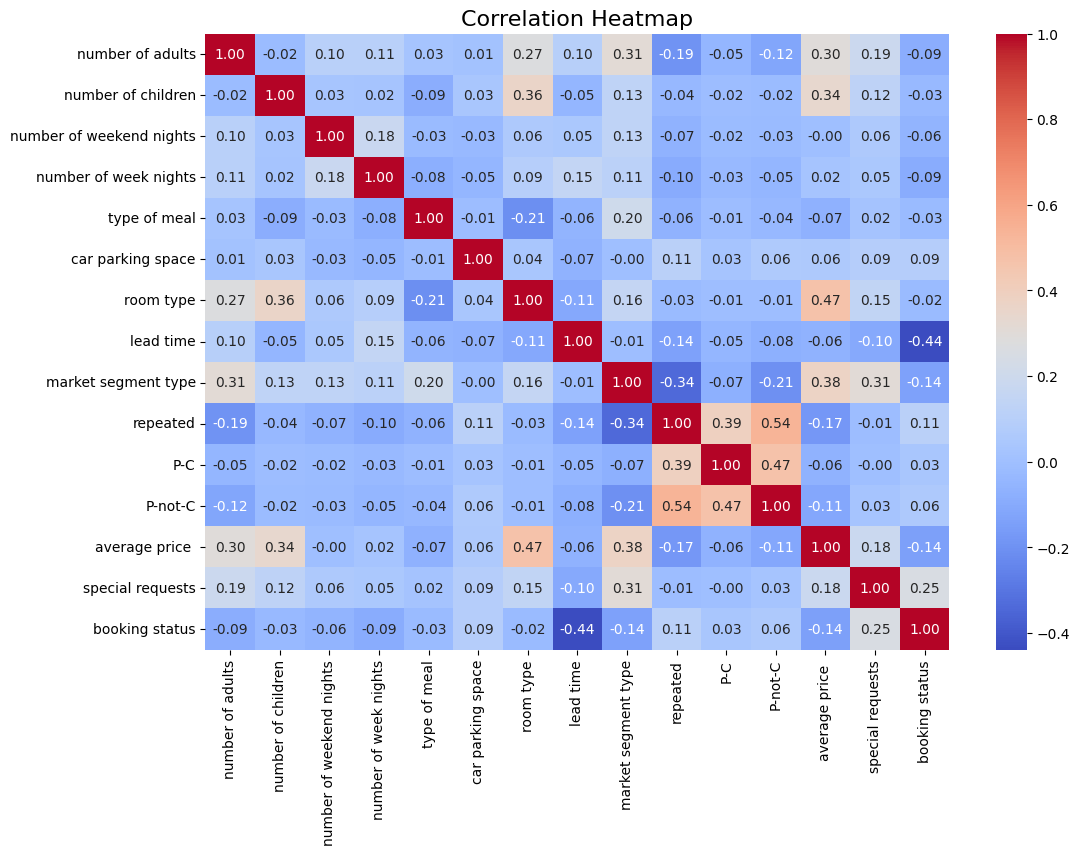

In [19]:
correlation = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, 
            annot=True,           
            fmt=".2f",            
            cmap="coolwarm",      
            cbar=True)            
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## visualization

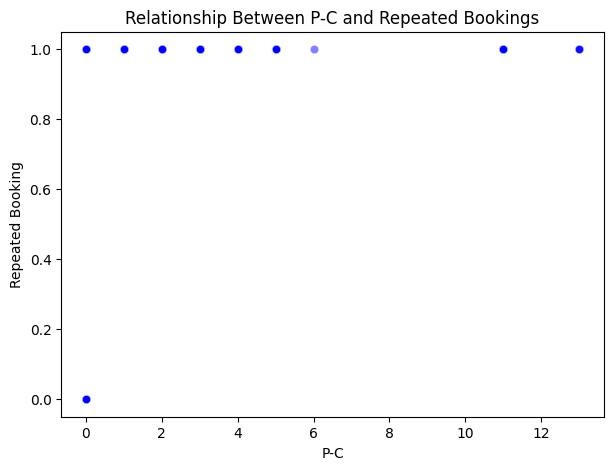

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.scatterplot(x=data['P-C'], y=data['repeated'], alpha=0.5, color='blue')
plt.title("Relationship Between P-C and Repeated Bookings")
plt.xlabel("P-C")
plt.ylabel("Repeated Booking")
plt.show()


## Check Outliers 

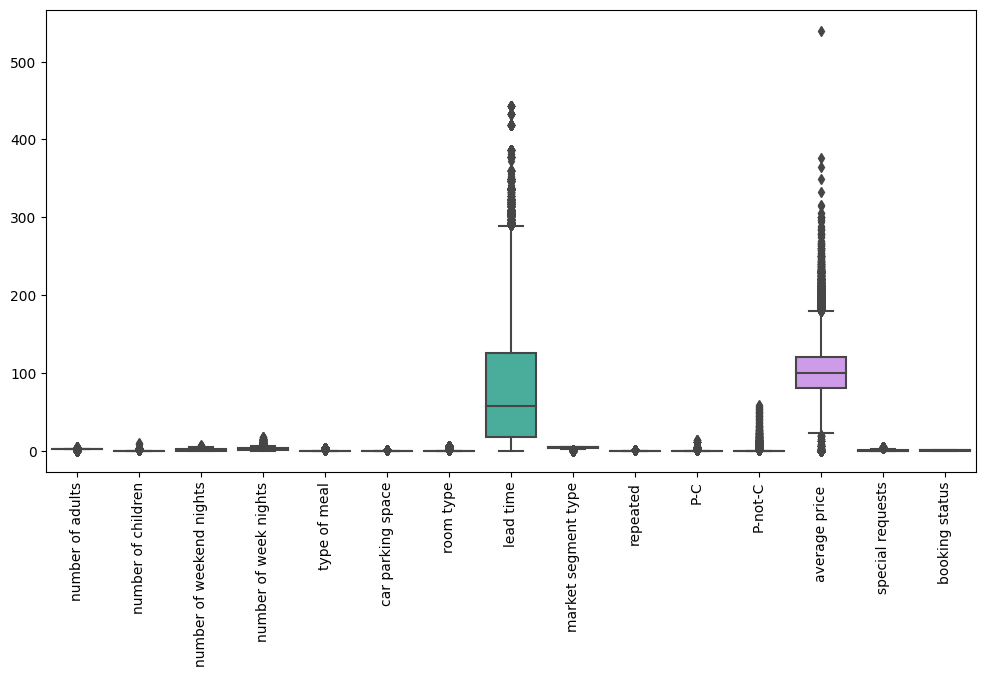

In [21]:

# Boxplot for all numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


## Handle Outliers

In [22]:
def remove_outliers_iqr(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        return df


data = remove_outliers_iqr(data,'lead time')


In [23]:
data.rename(columns={"average price ": "average_price"}, inplace=True)


In [24]:
data = remove_outliers_iqr(data,'average_price')

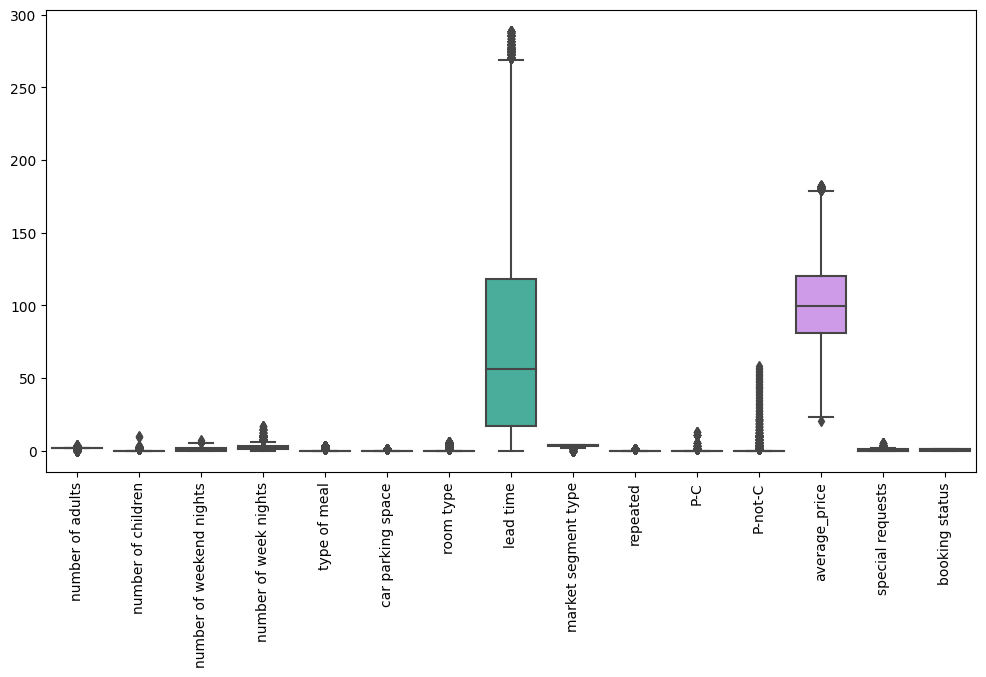

In [25]:

# Boxplot for all numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=data)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


## Check Imbalance Data

In [26]:
data['booking status'].value_counts()

booking status
1    22921
0    10424
Name: count, dtype: int64

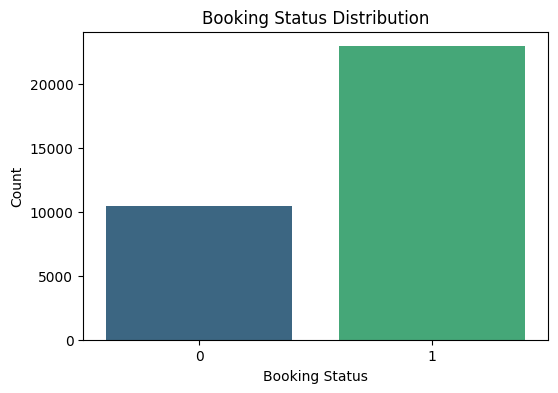

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x=data['booking status'], palette="viridis")
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.show()


## Handle imbalance data

In [28]:
X = data.drop(columns=['booking status']) 
y = data['booking status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())


booking status
1    18337
0    18337
Name: count, dtype: int64
